In [17]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
import os
print(os.getcwd())

C:\Users\Dell Latitude\Fundamentals of Data Science Project report 771766


In [19]:
df = pd.read_csv("content_census03.csv")
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Gray Centers,Rita,Owen,50,Head,Single,Female,Media planner,NaN,Christian
1,2,Gray Centers,Amber,James,21,Head,Single,Female,University Student,NaN,Muslim
2,3,Gray Centers,Oliver,Campbell,58,Head,Married,Male,Professor Emeritus,NaN,Christian
3,3,Gray Centers,Christine,Campbell,50,Wife,Married,Female,"Engineer, control and instrumentation",NaN,NaN
4,4,Gray Centers,Gordon,Miles,79,Head,Widowed,Male,Retired Retail banker,NaN,Christian


In [15]:
df.shape

(10083, 11)

In [16]:
df.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     659
Marital Status                   2557
Gender                              0
Occupation                          0
Infirmity                        9995
Religion                         5983
dtype: int64

In [18]:
df["Religion"].value_counts()

Religion
Christian      2243
Catholic       1002
Methodist       612
Muslim          129
Sikh             63
Jewish           41
Undecided         3
Buddist           1
Bahai             1
Housekeeper       1
Orthodoxy         1
Sith              1
Nope              1
                  1
Name: count, dtype: int64

In [19]:
df['Religion'] = df['Religion'].fillna('None')

In [20]:
df.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     659
Marital Status                   2557
Gender                              0
Occupation                          0
Infirmity                        9995
Religion                            0
dtype: int64

In [21]:
df = df.dropna()

In [22]:
df.shape

(60, 11)

In [23]:
df.dtypes

House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                              object
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

In [24]:
mask = df['Age'] != ' '

In [25]:
df = df[mask]

In [26]:
df.shape

(60, 11)

In [27]:
df['Age'] = df['Age'].astype(float)

In [65]:
df['Religion'].unique()

array(['Catholic', 'None', 'Methodist', 'Christian', 'Muslim'],
      dtype=object)

## 1. What should be built on an unoccupied plot of land that the local government wishes to develop?

### High density

In [29]:
# Justification for High-density Housing
# Check household occupancy levels
household_occupancy = df.groupby('House Number')['Surname'].count()
avg_occupancy = household_occupancy.mean()

# Analyze age distribution for a significant increase in younger age groups
age_distribution = df['Age']
population_expansion = age_distribution[age_distribution < 30].count() / len(age_distribution)

threshold_value = avg_occupancy + 1.5 * household_occupancy.std()
threshold_percentage = 0.2

# Justify: High-density housing if average household occupancy is high and there's a significant proportion of young residents indicating population expansion.
if avg_occupancy > threshold_value and population_expansion > threshold_percentage:
    print("Justification for High-density Housing: High demand due to increased population and high household occupancy.")


### Low density

In [30]:
# Justification for Low-density Housing
total_population = len(df)
threshold_percentage = 0.2

threshold_value = total_population * threshold_percentage

# Identify family structures from relationship data
family_structures = df[df['Relationship to Head of House'].isin(['Wife', 'Husband', 'Partner', 'Child'])]

# Justify: Low-density housing if there's a prevalence of family structures, indicating a potential demand for larger family housing.
if len(family_structures) > threshold_value:
    print("Justification for Low-density Housing: Prevalence of family structures suggests a need for larger housing units.")


### Train station

In [31]:
# Justification for Train Station
total_population = len(df)
# Calculate the threshold value based on a percentage of the total population
commuter_percentage_threshold = 10  # For instance, considering 5% as a threshold
threshold_value = total_population * (commuter_percentage_threshold / 100)

# Identify commuters or professions likely to commute
commuters = df[df['Occupation'].str.contains('Student|Professor|Engineer', na=False)]

# Justify: Train station if a notable proportion of individuals have professions or statuses suggesting commuting behavior.
if len(commuters) > threshold_value:
    print("Justification for Train Station: Significant number of individuals with commuting professions or student status.")


Justification for Train Station: Significant number of individuals with commuting professions or student status.


### Religious Building

In [32]:
# Justification for Religious Building
total_population = len(df)
threshold_percentage = 0.1  # Adjust this value as needed

# Calculate the minimum count of unique religions required to meet the threshold
min_religion_count = total_population * threshold_percentage

# Assess religious diversity and demand
religious_diversity = df['Religion'].nunique()

# Justify: Religious building if there's religious diversity and evidence suggesting demand for additional religious facilities.
if religious_diversity > min_religion_count:
    print("Justification for Religious Building: Diverse religious affiliations suggest potential demand for additional facilities.")

### Emergency Medical Building

In [33]:
# Justification for Emergency Medical Building
total_population = len(df)

# Define a percentage threshold for high-risk ages
threshold_percentage = 10  # Adjust this percentage as needed

# Calculate the threshold value based on the defined percentage
threshold_value = total_population * (threshold_percentage / 100)

# Analyze age demographics for potential healthcare needs
high_risk_ages = df[df['Age'] > 60]
high_risk_ages_count = len(high_risk_ages)

# Justify: Emergency medical building if there's a significant count of individuals in high-risk age groups indicating potential healthcare needs.
if high_risk_ages_count > threshold_value:
    print("Justification for Emergency Medical Building: Significant count of individuals in high-risk age groups may require medical attention.")

Justification for Emergency Medical Building: Significant count of individuals in high-risk age groups may require medical attention.


## 2. Which one of the following options should be invested in?

### For Employment and Training

In [34]:
threshold_percentage = 10  # Adjust this percentage as needed

# Check unemployment rates by age group
unemployment_by_age = df.groupby('Age').apply(lambda x: (x['Occupation'] == 'None').sum())
# Calculate the threshold value based on the defined percentage
threshold_value = unemployment_by_age.mean() * (threshold_percentage / 100)

# Justify: Employment and training if there's evidence of high unemployment rates across different age groups, indicating a need for retraining or new skills.
if unemployment_by_age.mean() > threshold_value:
    print("Justification for Employment and Training: High unemployment rates suggest a need for retraining or new skill development.")


### For Old Age Care

In [35]:
total_population = len(df)
retirement_age = 65
retirement_percentage = 20
threshold_value = total_population * (retirement_percentage / 100)

# Analyze the distribution of retired individuals
retired_individuals = df[(df['Marital Status'] == 'Widowed') | (df['Age'] > retirement_age)]

# Justify: Old age care if there's a notable increase in the number of retired or widowed individuals indicating a potential need for end-of-life care.
if len(retired_individuals) > threshold_value:
    print("Justification for Old Age Care: Significant count of retired or widowed individuals may require increased end-of-life care funding.")


### For Increased Schooling Spending

In [61]:
total_population = len(df)
school_age_percentage = 15
threshold_value = total_population * (school_age_percentage / 100)

school_start_age = 5
school_end_age = 18

# Analyze the age distribution for school-aged children
school_aged_children = df[(df['Age'] >= school_start_age) & (df['Age'] <= school_end_age)]

# Justify: Increased schooling spending if there's evidence of a growing population of school-aged children, indicating a need for increased education funding.
if len(school_aged_children) > threshold_value:
    print("Justification for Increased Schooling Spending: Growing population of school-aged children suggests the need for increased education funding.")


### For General Infrastructure

In [37]:
hypothetical_initial_population = 10000  # Replace with a suitable assumed initial count
current_population_count = len(df)

growth_threshold = 10

# Analyze the overall population growth trend

population_growth_rate = abs(((current_population_count - hypothetical_initial_population) / hypothetical_initial_population) * 100)

# Justify: General infrastructure if there's evidence of town expansion indicated by a substantial population growth rate.
if population_growth_rate > growth_threshold:
    print("Justification for General Infrastructure: High population growth suggests the need for increased investment in town services and infrastructure.")


Justification for General Infrastructure: High population growth suggests the need for increased investment in town services and infrastructure.


# Data Analysis

### Examine the age distribution (age pyramid) of the population. Is it growing or shrinking? Will there be more retired aged people in the future, more school-aged children, more young people, etc.

In [2]:
content_census03 = pd.read_csv("content_census03.csv")

# Display the first few rows of the DataFrame to verify it was loaded correctly
print(content_census03.head())

NameError: name 'pd' is not defined

In [43]:
content_census03['Age'] = pd.to_numeric(content_census03['Age'], errors='coerce')


In [46]:
for i, j in content_census03.iterrows():
    print(f"Index: {i}, 'Age' value: {content_census03.at[i, 'Age']}")


Index: 0, 'Age' value: 50.0
Index: 1, 'Age' value: 21.0
Index: 2, 'Age' value: 58.0
Index: 3, 'Age' value: 50.0
Index: 4, 'Age' value: 79.0
Index: 5, 'Age' value: 62.0
Index: 6, 'Age' value: 63.0
Index: 7, 'Age' value: 50.0
Index: 8, 'Age' value: 35.0
Index: 9, 'Age' value: 29.0
Index: 10, 'Age' value: 45.0
Index: 11, 'Age' value: 43.0
Index: 12, 'Age' value: 58.0
Index: 13, 'Age' value: 54.0
Index: 14, 'Age' value: 44.0
Index: 15, 'Age' value: 52.0
Index: 16, 'Age' value: 17.0
Index: 17, 'Age' value: 16.0
Index: 18, 'Age' value: 14.0
Index: 19, 'Age' value: 8.0
Index: 20, 'Age' value: 23.0
Index: 21, 'Age' value: 1.0
Index: 22, 'Age' value: 24.0
Index: 23, 'Age' value: 38.0
Index: 24, 'Age' value: 40.0
Index: 25, 'Age' value: 41.0
Index: 26, 'Age' value: 5.0
Index: 27, 'Age' value: 2.0
Index: 28, 'Age' value: 1.0
Index: 29, 'Age' value: 40.0
Index: 30, 'Age' value: 41.0
Index: 31, 'Age' value: 12.0
Index: 32, 'Age' value: 9.0
Index: 33, 'Age' value: 61.0
Index: 34, 'Age' value: 26.0
I

Index: 1211, 'Age' value: 32.0
Index: 1212, 'Age' value: 55.0
Index: 1213, 'Age' value: 36.0
Index: 1214, 'Age' value: 37.0
Index: 1215, 'Age' value: 26.0
Index: 1216, 'Age' value: 64.0
Index: 1217, 'Age' value: 53.0
Index: 1218, 'Age' value: 45.0
Index: 1219, 'Age' value: 43.0
Index: 1220, 'Age' value: 13.0
Index: 1221, 'Age' value: 8.0
Index: 1222, 'Age' value: 7.0
Index: 1223, 'Age' value: 3.0
Index: 1224, 'Age' value: 1.0
Index: 1225, 'Age' value: 32.0
Index: 1226, 'Age' value: 53.0
Index: 1227, 'Age' value: 50.0
Index: 1228, 'Age' value: 48.0
Index: 1229, 'Age' value: 48.0
Index: 1230, 'Age' value: 16.0
Index: 1231, 'Age' value: 8.0
Index: 1232, 'Age' value: 4.0
Index: 1233, 'Age' value: 40.0
Index: 1234, 'Age' value: 42.0
Index: 1235, 'Age' value: 4.0
Index: 1236, 'Age' value: 3.0
Index: 1237, 'Age' value: 0.0
Index: 1238, 'Age' value: 37.0
Index: 1239, 'Age' value: 35.0
Index: 1240, 'Age' value: 8.0
Index: 1241, 'Age' value: 6.0
Index: 1242, 'Age' value: 4.0
Index: 1243, 'Age' v

Index: 2672, 'Age' value: 9.0
Index: 2673, 'Age' value: 8.0
Index: 2674, 'Age' value: 77.0
Index: 2675, 'Age' value: 78.0
Index: 2676, 'Age' value: 49.0
Index: 2677, 'Age' value: 48.0
Index: 2678, 'Age' value: 45.0
Index: 2679, 'Age' value: 43.0
Index: 2680, 'Age' value: 43.0
Index: 2681, 'Age' value: 39.0
Index: 2682, 'Age' value: 38.0
Index: 2683, 'Age' value: 35.0
Index: 2684, 'Age' value: 11.0
Index: 2685, 'Age' value: 36.0
Index: 2686, 'Age' value: 38.0
Index: 2687, 'Age' value: 19.0
Index: 2688, 'Age' value: 16.0
Index: 2689, 'Age' value: 12.0
Index: 2690, 'Age' value: 12.0
Index: 2691, 'Age' value: 76.0
Index: 2692, 'Age' value: 54.0
Index: 2693, 'Age' value: 19.0
Index: 2694, 'Age' value: 15.0
Index: 2695, 'Age' value: 12.0
Index: 2696, 'Age' value: 8.0
Index: 2697, 'Age' value: 7.0
Index: 2698, 'Age' value: 7.0
Index: 2699, 'Age' value: 3.0
Index: 2700, 'Age' value: 0.0
Index: 2701, 'Age' value: 55.0
Index: 2702, 'Age' value: 28.0
Index: 2703, 'Age' value: 29.0
Index: 2704, 'A

Index: 4712, 'Age' value: 33.0
Index: 4713, 'Age' value: 40.0
Index: 4714, 'Age' value: 6.0
Index: 4715, 'Age' value: 29.0
Index: 4716, 'Age' value: 23.0
Index: 4717, 'Age' value: 59.0
Index: 4718, 'Age' value: 63.0
Index: 4719, 'Age' value: 41.0
Index: 4720, 'Age' value: 42.0
Index: 4721, 'Age' value: 10.0
Index: 4722, 'Age' value: 9.0
Index: 4723, 'Age' value: 6.0
Index: 4724, 'Age' value: 52.0
Index: 4725, 'Age' value: 53.0
Index: 4726, 'Age' value: 16.0
Index: 4727, 'Age' value: 15.0
Index: 4728, 'Age' value: 14.0
Index: 4729, 'Age' value: 54.0
Index: 4730, 'Age' value: 57.0
Index: 4731, 'Age' value: 8.0
Index: 4732, 'Age' value: 6.0
Index: 4733, 'Age' value: 3.0
Index: 4734, 'Age' value: 3.0
Index: 4735, 'Age' value: 1.0
Index: 4736, 'Age' value: 70.0
Index: 4737, 'Age' value: 72.0
Index: 4738, 'Age' value: 42.0
Index: 4739, 'Age' value: 41.0
Index: 4740, 'Age' value: 39.0
Index: 4741, 'Age' value: 30.0
Index: 4742, 'Age' value: 6.0
Index: 4743, 'Age' value: 21.0
Index: 4744, 'Age

Index: 6981, 'Age' value: 21.0
Index: 6982, 'Age' value: 20.0
Index: 6983, 'Age' value: 17.0
Index: 6984, 'Age' value: 54.0
Index: 6985, 'Age' value: 20.0
Index: 6986, 'Age' value: 16.0
Index: 6987, 'Age' value: 13.0
Index: 6988, 'Age' value: 12.0
Index: 6989, 'Age' value: 52.0
Index: 6990, 'Age' value: 50.0
Index: 6991, 'Age' value: 40.0
Index: 6992, 'Age' value: 38.0
Index: 6993, 'Age' value: 16.0
Index: 6994, 'Age' value: 56.0
Index: 6995, 'Age' value: 59.0
Index: 6996, 'Age' value: 62.0
Index: 6997, 'Age' value: 59.0
Index: 6998, 'Age' value: 38.0
Index: 6999, 'Age' value: 14.0
Index: 7000, 'Age' value: 76.0
Index: 7001, 'Age' value: 62.0
Index: 7002, 'Age' value: 58.0
Index: 7003, 'Age' value: 69.0
Index: 7004, 'Age' value: 71.0
Index: 7005, 'Age' value: 26.0
Index: 7006, 'Age' value: 23.0
Index: 7007, 'Age' value: 3.0
Index: 7008, 'Age' value: 57.0
Index: 7009, 'Age' value: 45.0
Index: 7010, 'Age' value: 47.0
Index: 7011, 'Age' value: 49.0
Index: 7012, 'Age' value: 7.0
Index: 701

Index: 8350, 'Age' value: 31.0
Index: 8351, 'Age' value: 30.0
Index: 8352, 'Age' value: 26.0
Index: 8353, 'Age' value: 24.0
Index: 8354, 'Age' value: 21.0
Index: 8355, 'Age' value: 18.0
Index: 8356, 'Age' value: 15.0
Index: 8357, 'Age' value: 12.0
Index: 8358, 'Age' value: 8.0
Index: 8359, 'Age' value: 7.0
Index: 8360, 'Age' value: 7.0
Index: 8361, 'Age' value: 5.0
Index: 8362, 'Age' value: 2.0
Index: 8363, 'Age' value: 0.0
Index: 8364, 'Age' value: 45.0
Index: 8365, 'Age' value: 26.0
Index: 8366, 'Age' value: 62.0
Index: 8367, 'Age' value: 64.0
Index: 8368, 'Age' value: 38.0
Index: 8369, 'Age' value: 36.0
Index: 8370, 'Age' value: 35.0
Index: 8371, 'Age' value: 32.0
Index: 8372, 'Age' value: 32.0
Index: 8373, 'Age' value: 29.0
Index: 8374, 'Age' value: 25.0
Index: 8375, 'Age' value: 21.0
Index: 8376, 'Age' value: 8.0
Index: 8377, 'Age' value: 43.0
Index: 8378, 'Age' value: 48.0
Index: 8379, 'Age' value: 9.0
Index: 8380, 'Age' value: 6.0
Index: 8381, 'Age' value: 3.0
Index: 8382, 'Age'

Index: 9991, 'Age' value: 14.0
Index: 9992, 'Age' value: 14.0
Index: 9993, 'Age' value: 14.0
Index: 9994, 'Age' value: 46.0
Index: 9995, 'Age' value: 42.0
Index: 9996, 'Age' value: 20.0
Index: 9997, 'Age' value: 17.0
Index: 9998, 'Age' value: 14.0
Index: 9999, 'Age' value: 10.0
Index: 10000, 'Age' value: 7.0
Index: 10001, 'Age' value: 4.0
Index: 10002, 'Age' value: 2.0
Index: 10003, 'Age' value: 34.0
Index: 10004, 'Age' value: 43.0
Index: 10005, 'Age' value: 51.0
Index: 10006, 'Age' value: 77.0
Index: 10007, 'Age' value: 41.0
Index: 10008, 'Age' value: 34.0
Index: 10009, 'Age' value: 30.0
Index: 10010, 'Age' value: 28.0
Index: 10011, 'Age' value: 24.0
Index: 10012, 'Age' value: 21.0
Index: 10013, 'Age' value: 17.0
Index: 10014, 'Age' value: 16.0
Index: 10015, 'Age' value: 16.0
Index: 10016, 'Age' value: 12.0
Index: 10017, 'Age' value: 8.0
Index: 10018, 'Age' value: 5.0
Index: 10019, 'Age' value: 0.0
Index: 10020, 'Age' value: 0.0
Index: 10021, 'Age' value: 59.0
Index: 10022, 'Age' valu

[Text(0.5, 0, 'Population Count'), Text(0, 0.5, 'Age Group')]

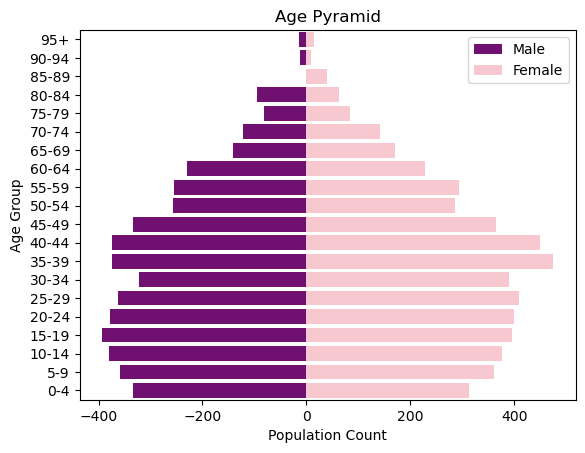

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# POPULATION PYRAMID START HERE
# ADD AGE GROUP COLUMN TO BIN WITH
for i,j in content_census03.iterrows():
    if content_census03.at[i, 'Age'] < 5:
        content_census03.at[i, 'Age Group'] = '0-4'
    elif content_census03.at[i, 'Age'] >= 5 and content_census03.at[i,'Age'] < 10:
        content_census03.at[i, 'Age Group'] = '5-9'
    elif content_census03.at[i, 'Age'] >= 10 and content_census03.at[i,'Age'] < 15:
        content_census03.at[i, 'Age Group'] = '10-14'
    elif content_census03.at[i, 'Age'] >= 15 and content_census03.at[i,'Age'] < 20:
        content_census03.at[i, 'Age Group'] = '15-19'
    elif content_census03.at[i, 'Age'] >= 20 and content_census03.at[i,'Age'] < 25:
        content_census03.at[i, 'Age Group'] = '20-24'
    elif content_census03.at[i, 'Age'] >= 25 and content_census03.at[i,'Age'] < 30:
        content_census03.at[i, 'Age Group'] = '25-29'
    elif content_census03.at[i, 'Age'] >= 30 and content_census03.at[i,'Age'] < 35:
        content_census03.at[i, 'Age Group'] = '30-34'
    elif content_census03.at[i, 'Age'] >= 35 and content_census03.at[i,'Age'] < 40:
        content_census03.at[i, 'Age Group'] = '35-39'
    elif content_census03.at[i, 'Age'] >= 40 and content_census03.at[i,'Age'] < 45:
        content_census03.at[i, 'Age Group'] = '40-44'
    elif content_census03.at[i, 'Age'] >= 45 and content_census03.at[i,'Age'] < 50:
        content_census03.at[i, 'Age Group'] = '45-49'
    elif content_census03.at[i, 'Age'] >= 50 and content_census03.at[i,'Age'] < 55:
        content_census03.at[i, 'Age Group'] = '50-54'
    elif content_census03.at[i, 'Age'] >= 55 and content_census03.at[i,'Age'] < 60:
        content_census03.at[i, 'Age Group'] = '55-59'
    elif content_census03.at[i, 'Age'] >= 60 and content_census03.at[i, 'Age'] < 65:

        content_census03.at[i, 'Age Group'] = '60-64'
    elif content_census03.at[i, 'Age'] >= 65 and content_census03.at[i,'Age'] < 70:
        content_census03.at[i, 'Age Group'] = '65-69'
    elif content_census03.at[i, 'Age'] >= 70 and content_census03.at[i,'Age'] < 75:
        content_census03.at[i, 'Age Group'] = '70-74'
    elif content_census03.at[i, 'Age'] >= 75 and content_census03.at[i,'Age'] < 80:
        content_census03.at[i, 'Age Group'] = '75-79'
    elif content_census03.at[i, 'Age'] >= 80 and content_census03.at[i,'Age'] < 85:
        content_census03.at[i, 'Age Group'] = '80-84'
    elif content_census03.at[i, 'Age'] >= 85 and content_census03.at[i,'Age'] < 90:
        content_census03.at[i, 'Age Group'] = '85-89'
    elif content_census03.at[i, 'Age'] >= 90 and content_census03.at[i,'Age'] < 95:
        content_census03.at[i, 'Age Group'] = '90-94'
    elif content_census03.at[i, 'Age'] >= 95:
        content_census03.at[i, 'Age Group'] = '95+'
        
        # FOR MALE GROUP

Male1 = []
Male2 = []
Male3 = []
Male4 = []
Male5 = []
Male6 = []
Male7 = []
Male8 = []
Male9 = []
Male10 = []
Male11 = []
Male12 = []
Male13 = []
Male14 = []
Male15 = []
Male16 = []
Male17 = []
Male18 = []
Male19 = []
Male20 = []

for i, j in content_census03.iterrows():
    if content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '0-4':
        Male1.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '5-9':
        Male2.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '10-14':
        Male3.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '15-19':
        Male4.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '20-24':
        Male5.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '25-29':
        Male6.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '30-34':
        Male7.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '35-39':
        Male8.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '40-44':
        Male9.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '45-49':
        Male10.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '50-54':
        Male11.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '55-59':
        Male12.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '60-64':
        Male13.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '65-69':
        Male14.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '70-74':
        Male15.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '75-79':
        Male16.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '80-84':
        Male17.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '85-89':
        Male17.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '90-94':
        Male19.append(i)
    elif content_census03.at[i, 'Gender'] == 'Male' and content_census03.at[i, 'Age Group'] == '95+':
        Male20.append(i)

# Initialize Female lists
Female1 = []
Female2 = []
Female3 = []
Female4 = []
Female5 = [] 
Female6 = []
# Add this line
# ... (initialize other Female lists)        
Female7 = []
Female8 = []
Female9 = []
Female10 = []
Female11 = []
Female12 = []
Female13 = []
Female14 = []
Female15 = []
Female16 = []
Female17 = []
Female18 = []
Female19 = []
Female20 = []
for i, j in content_census03.iterrows():
    if content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '0-4':
        Female1.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '5-9':
        Female2.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '10-14':
        Female3.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '15-19':
        Female4.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '20-24':
        Female5.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '25-29':
        Female6.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '30-34':
        Female7.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '35-39':
        Female8.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '40-44':
        Female9.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '45-49':
        Female10.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '50-54':
        Female11.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '55-59':
        Female12.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '60-64':
        Female13.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '65-69':
        Female14.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '70-74':
        Female15.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '75-79':
        Female16.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '80-84':
        Female17.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '85-89':
        Female18.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '90-94':
        Female19.append(i)
    elif content_census03.at[i, 'Gender'] == 'Female' and content_census03.at[i, 'Age Group'] == '95+':
        Female20.append(i)


# MAKE A LIST OF THE MALE AND FEMALE IN EACH GROUP
male = [len(Male1), len(Male2),len(Male3),len(Male4),len(Male5),len(Male6),len(Male7),len(Male8),len(Male9),len(Male10),len(Male11),len(Male12),len(Male13),len(Male14),len(Male15),len(Male16),len(Male17),len(Male18),len(Male19),len(Male20)][::-1]
female = [len(Female1), len(Female2), len(Female3), len(Female4), len(Female5), len(Female6), len(Female7), len(Female8), len(Female9), len(Female10), len(Female11), len(Female12), len(Female13), len(Female14), len(Female15), len(Female16), len(Female17), len(Female18), len(Female19),len(Female20)][::-1]


# MULTIPLY THE MALE ENTRIES BY -1
male_neg = [x * -1 for x in male]
age_p = pd.DataFrame({'Age':['95+', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64','55-59', '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4'],
                     'Male': male_neg,
                      'Female': female})
AgeClass = ['95+', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64','55-59', '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4']


# PLOTTING THE AGE PYRAMID
age_pyramid = sns.barplot(x='Male', y='Age', data=age_p, order=AgeClass, color=('purple'), label='Male')
age_pyramid = sns.barplot(x='Female', y='Age', data=age_p, order=AgeClass, color=('pink'), label='Female')
age_pyramid.legend()
plt.title('Age Pyramid')
age_pyramid.set(xlabel='Population Count', ylabel='Age Group')

### Examine unemployment trends. Are certain ages more likely to be unemployed than others.

(660, 11)


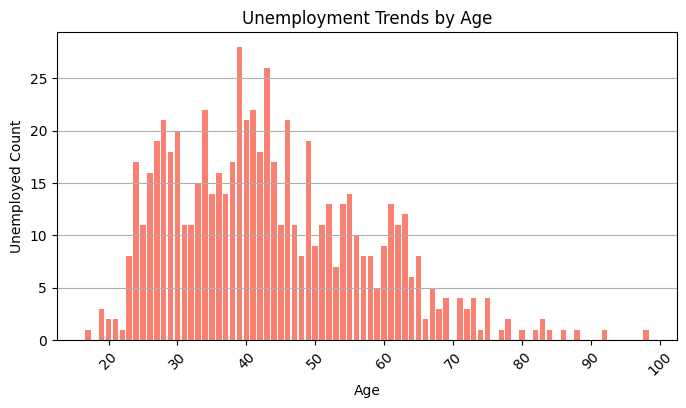

In [47]:
import matplotlib.pyplot as plt

# Assuming 'Occupation' column contains 'None' for unemployed individuals
unemployed = df[df['Occupation'] == 'Unemployed']

print(unemployed.shape)
# Count unemployed individuals by age
unemployed_by_age = unemployed.groupby('Age').size().reset_index(name='Unemployed Count')

# Sort by age for better visualization
unemployed_by_age = unemployed_by_age.sort_values('Age')

# Plotting unemployment trends by age
plt.figure(figsize=(8, 4))
plt.bar(unemployed_by_age['Age'], unemployed_by_age['Unemployed Count'], color='salmon')
plt.xlabel('Age')
plt.ylabel('Unemployed Count')
plt.title('Unemployment Trends by Age')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Examine religious affiliations. Are any religions growing, or shrinking? Are there any newer religions that are increasing in numbers?

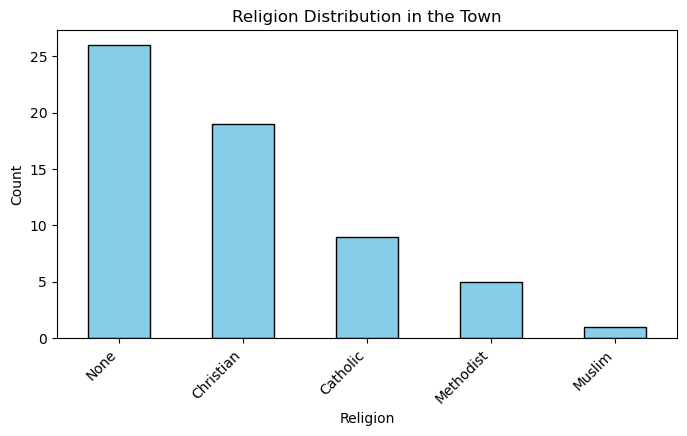

In [63]:
# Check unique values in the 'Religion' column
religions = df['Religion'].unique()

# Count the occurrences of each religion
religion_counts = df['Religion'].value_counts()

# Plot a bar plot
fig, ax = plt.subplots(figsize=(8, 4))
religion_counts.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)

# Add labels and title
ax.set_xlabel('Religion')
ax.set_ylabel('Count')
ax.set_title('Religion Distribution in the Town')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

## Examine the divorce and marriage Rate 

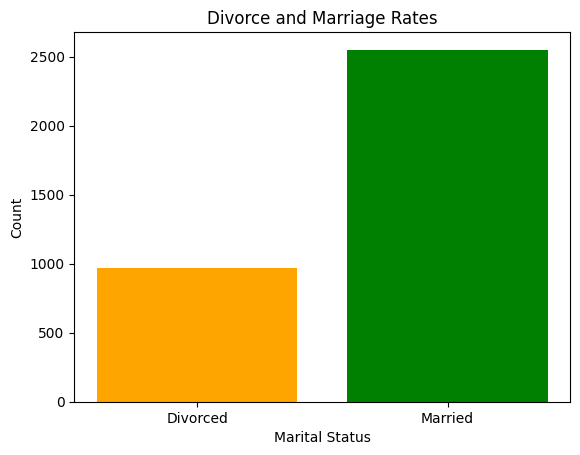

In [38]:
import matplotlib.pyplot as plt

# Count the frequencies of different marital statuses
marital_status_counts = df['Marital Status'].value_counts()

# Extracting divorce and marriage counts
divorced_count = marital_status_counts.get('Divorced', 0)
married_count = marital_status_counts.get('Married', 0)

# Creating a bar plot
statuses = ['Divorced', 'Married']
counts = [divorced_count, married_count]

plt.bar(statuses, counts, color=['orange', 'green'])
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Divorce and Marriage Rates')
plt.show()

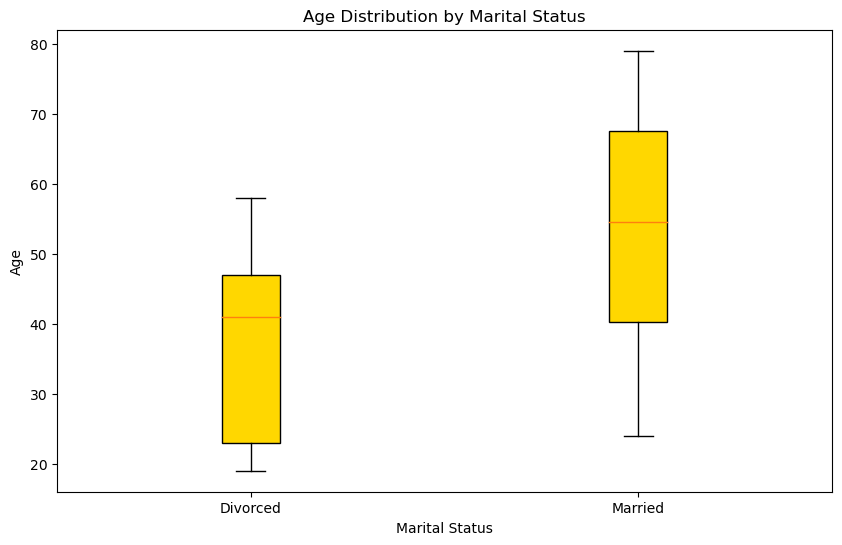

In [60]:
import matplotlib.pyplot as plt

# Assuming you've already loaded the DataFrame df

# Extracting age data for different marital statuses
divorced_age = df[df['Marital Status'] == 'Divorced']['Age']
married_age = df[df['Marital Status'] == 'Married']['Age']

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot([divorced_age, married_age], labels=['Divorced', 'Married'], patch_artist=True, boxprops=dict(facecolor='gold'))

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Age Distribution by Marital Status')

# Show the plot
plt.show()

### Examine the occupancy level (how many people per house) and determine if existing housing is being under or over-used.

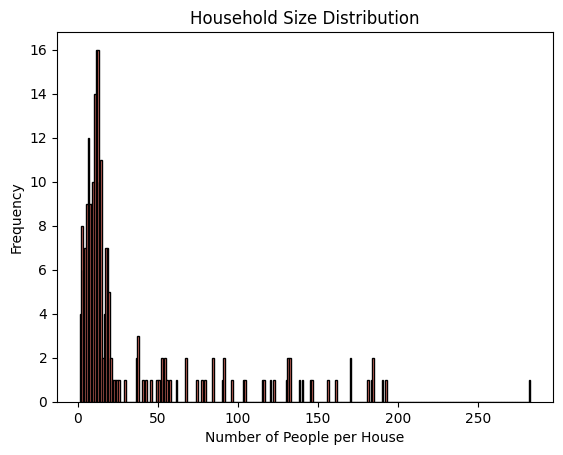

In [39]:
import matplotlib.pyplot as plt

# Calculate the number of people per house (Household Size)
household_sizes = df.groupby('House Number')['Surname'].count()

# Plotting household size distribution
plt.hist(household_sizes, bins=range(min(household_sizes), max(household_sizes) + 1), color='salmon', edgecolor='black')
plt.xlabel('Number of People per House')
plt.ylabel('Frequency')
plt.title('Household Size Distribution')
plt.show()

### Examine the number of university students. All of these are commuters since there are no universities in the town. Are there any other professions that are likely to be commuters?


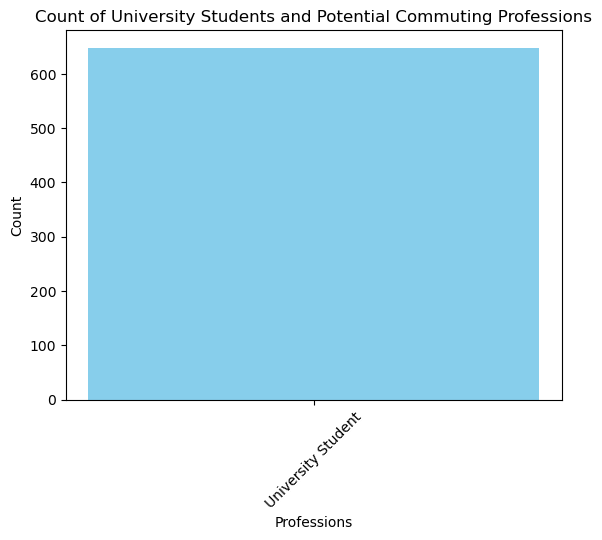

In [10]:
import matplotlib.pyplot as plt

# Filtering university students and other potential commuting professions
commuter_professions = df[df['Occupation'] == 'University Student']

# Counting occurrences of each profession
profession_counts = commuter_professions['Occupation'].value_counts()

# Creating a bar plot for university students and potential commuting professions
plt.bar(profession_counts.index, profession_counts.values, color='skyblue')
plt.xlabel('Professions')
plt.ylabel('Count')
plt.title('Count of University Students and Potential Commuting Professions')
plt.xticks(rotation=45)
plt.show()

### Calculating Death and Birth rates


In [22]:
# calculating Crude BirthRate

previous_years = (df["Age"] == 0).value_counts()
total = df.shape[0]

rudeBirthRate = (previous_years/total)* 1000
crudeBirthRate

Age
False    1000.0
Name: count, dtype: float64

In [29]:
# CALCULATING DEATH RATE

# Convert the "Age" column to numeric type, handling errors by coercing them to NaN
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")


# Count the number of occurrences where 'Age' is greater than or equal to 65
deaths = (df["Age"] >= 65).sum()

# Calculate the death rate per 1,000 people
total_population = df.shape[0]
death_rate = (deaths / total_population) * 1000

print("Death Rate:", death_rate)

Death Rate: 97.8875334721809
